In [1]:
import skimage as ski
import skimage.data as data
import matplotlib.pyplot as plt
import numpy as np

In [2]:
im = data.astronaut()

# Translation

In [25]:
def translatebad(im, pos):
    im2 = np.zeros_like(im)
    rows, cols = im.shape[:2]
    dr, dc = pos
    for i in range(rows):
        for j in range(cols):
            if i+dr < 0 or i+dr >= rows or j+dc < 0 or j+dc >= cols:
                continue
            im2[i+dr, j+dc] = im[i, j]
    return im2

%timeit translatebad(im, (200, 100))

276 ms ± 9.21 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
def translate(im, pos):
    im2 = np.zeros_like(im)
    dr, dc = pos
    im2[dr:, dc:, :] = im[:-dr, :-dc, :]
    return im2

%timeit translate(im, (200, 100))

51.1 µs ± 4.41 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [21]:
im2 = translate(im, (200, 100))

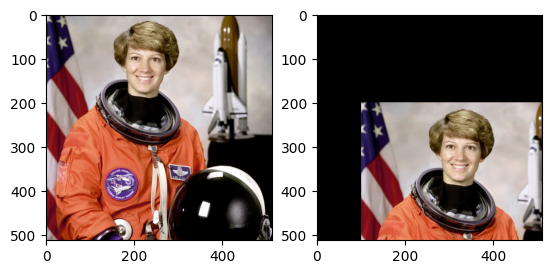

In [22]:
plt.subplot(1, 2, 1)
plt.imshow(im)
plt.subplot(1, 2, 2)
plt.imshow(im2)
plt.show()

# Scaling

In [52]:
def scale(im, factor):
    rows, cols, channels = im.shape
    im2 = np.zeros((int(rows*factor), int(cols*factor), channels), dtype=int)
    im2[::factor, ::factor] = im
    im2[::factor, 1::factor] = im
    im2[1::factor, ::factor] = im
    im2[1::factor, 1::factor] = im
    return im2

In [53]:
im2 = scale(im, 2)

In [54]:
print(im.shape, im2.shape)

(512, 512, 3) (1024, 1024, 3)


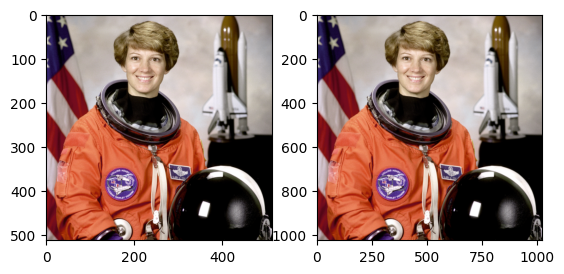

In [55]:
plt.subplot(1, 2, 1)
plt.imshow(im)
plt.subplot(1, 2, 2)
plt.imshow(im2)
plt.show()